<a href="https://colab.research.google.com/github/avelad31/Conversion-.xml-File-to-.csv-and-.xlsx-Files/blob/main/conversion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conversion de Archivo .xml a .csv y .xlsx**


In [1]:
import pandas as pd
import requests as req
import xml.etree.ElementTree as ET
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Descargamos el archivo XML desde la URL de la data
response = req.get('https://raw.githubusercontent.com/avelad31/Conversion-.xml-File-to-.csv-and-.xlsx-Files/main/datos2.xml')
response.raise_for_status()

# Parseamos el contenido del archivo XML
tree = ET.ElementTree(ET.fromstring(response.content))
root = tree.getroot()

# Inicializamos lista para almacenar datos
data = []

# Extraemos los datos en un intervalo definido
for data_point in root.findall('.//DataPt'):  # Encuentra todos los DataPt
    wavelength = int(data_point.get('WaveLen'))  # Obtenemos el atributo 'WaveLen' como entero
    if 350 <= wavelength <= 850:
        value = data_point.text
        data.append([wavelength, value])

# Creamos un DataFrame con los datos extraídos
df = pd.DataFrame(data, columns=['Wavelength', 'Value'])

# Exportamos los datos a un archivo CSV
df.to_csv('wavelength_data2.csv', index=False)

In [3]:
# Exportamos a archivo Excel
df.to_excel('wavelength_data2.xlsx', index=False)

In [4]:
df = pd.read_csv('wavelength_data2.csv')
df

,Wavelength,Value
0,350,0.000096
1,351,0.000106
2,352,0.000090
3,353,0.000098
4,354,0.000098
...,...,...
496,846,0.000036
497,847,0.000036
498,848,0.000034
499,849,0.000033


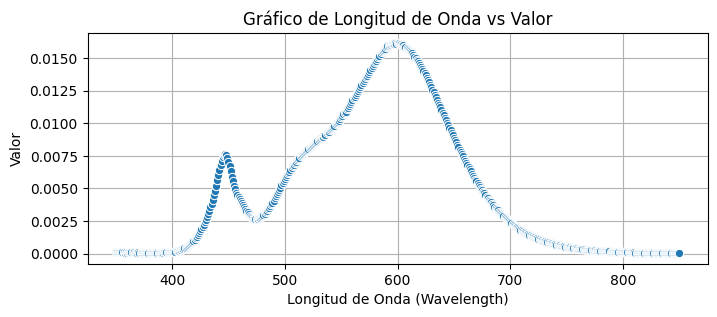

In [5]:
# Graficamos los datos
plt.figure(figsize=(8,3))
sns.lineplot(x='Wavelength', y='Value', data=df, marker='o')

plt.title('Gráfico de Longitud de Onda vs Valor')
plt.xlabel('Longitud de Onda (Wavelength)')
plt.ylabel('Valor')
plt.grid(True)

In [6]:
df.describe()

,Wavelength,Value
count,501.000000,501.000000
mean,600.000000,0.004871
std,144.770508,0.005192
min,350.000000,0.000031
25%,475.000000,0.000204
50%,600.000000,0.002909
75%,725.000000,0.008487
max,850.000000,0.016153
